In [1]:
# pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
from scipy.special import spherical_yn, spherical_jn

In [135]:

m1 = 939.565 #MeV/c^2
m2 = 3727.379 #MeV/c^2
hbar = 197 #MeV

mu = m1*m2/(m1+m2)

V0 = -15.0
a = 6

In [137]:
def calculate_phase_shift(k, K, l):

    ka = k * a
    Ka = K * a
    
    # K_element = ((K*jv(l, ka)*jvp(l, Ka)) - (K*jv(l, Ka)*jvp(l, ka))) / ((k*jv(l, Ka)*yvp(l, ka)) - (k*yv(l, ka)*jvp(l, Ka)))
    delta_l = np.arctan2(((K*spherical_jn(l, ka)*spherical_jn(l, Ka, True)) - (k*spherical_jn(l, Ka)*spherical_jn(l, ka, True))), ((k*spherical_jn(l, Ka)*spherical_yn(l, ka, True)) - (K*spherical_yn(l, ka)*spherical_jn(l, Ka, True))))

    return delta_l
    

In [139]:
def calculate_total_cross_sections(E_values, l_max):
    cross_sections = []
    for E in E_values:
        k = np.sqrt((2*mu*E)/hbar**2)
        kappa = np.sqrt((2*mu*(E-V0))/hbar**2)
        total_cross_section = 0.
        for l in range(l_max + 1):
            delta_l = calculate_phase_shift(k, kappa, l)
            total_cross_section += (2*l + 1) * (np.sin(delta_l)) ** 2
        cross_sections.append((4*np.pi / (k ** 2)) * total_cross_section)
    return cross_sections

In [141]:
E_values = np.linspace(0.1, 20.0, 100)
l_max = 0

cross_sections = calculate_total_cross_sections(E_values, l_max)

In [143]:
k_array = np.sqrt(2*mu*E_values / (hbar ** 2))
kappa_array = np.sqrt((2*mu*(E_values-V0))/hbar**2)

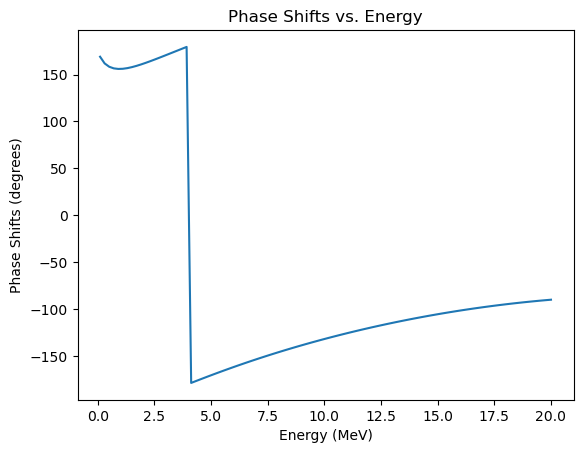

In [145]:
phase_shifts = (calculate_phase_shift(k_array, kappa_array, 0) * 180 / np.pi)

plt.plot(E_values, phase_shifts)
plt.xlabel("Energy (MeV)")
plt.ylabel("Phase Shifts (degrees)")
plt.title("Phase Shifts vs. Energy")
plt.show()

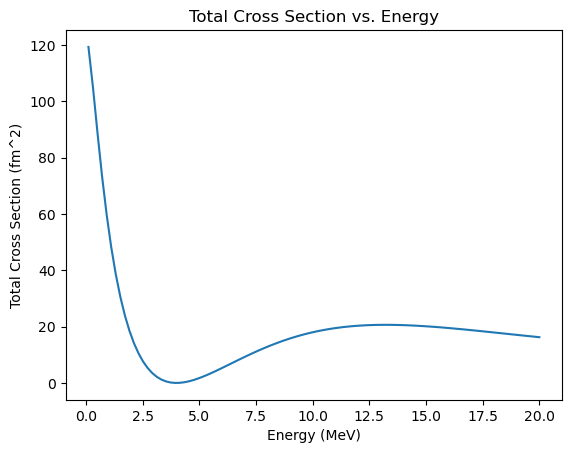

In [147]:
plt.plot(E_values, cross_sections)
plt.xlabel("Energy (MeV)")
plt.ylabel("Total Cross Section (fm^2)")
plt.title("Total Cross Section vs. Energy")
plt.show()